# Imports

In [1]:
import os
import glob
import re
import pandas as pd 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_theme()
from importlib import reload  


from IPython.display import clear_output


from config import *
from probe_data import probe_locations

In [2]:
D_m = 108E-3 # main pipe diameter (m)
D_b = 21E-3 # Branch pipe diameter (m)
T_h_les = 303
T_c_les = 288
T_c_stc = 36.5 + 273
T_h_stc = 95 + 273

# Probes

## Preprocessing

In [3]:
from manchester import ManchesterProbes

In [4]:
root = r'F:\LES_Manchester\UoM_TJ_LES-20211013T183109Z-001\UoM_TJ_LES'
working_dir = os.path.join(root, 'probes')
les = ManchesterProbes(working_dir, probe_locations, save_to='test_LES')

In [5]:
from csvtables import TableProbes

data_dir = r'F:\project1_Manchester\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Probes'
save_to = r'D:\Dropbox (MIT)\ResearchProjects\2020_CFD\DataProcessing\cfd_1_ManchesterLESVa/data/parsed_CFD_tables_v2'

# Initiate 
structs = TableProbes(
    data_dir = data_dir, 
    save_to = save_to,
    table_name = 'probes_table', 
    probe_locs=probe_locations,
    N_files=3000
    )

to_dict = structs.parse_all_columns(overwrite=False)

 16%|█▌        | 471/3000 [00:10<00:58, 43.57it/s]


KeyboardInterrupt: 

## Temperature

### Inst data

In [4]:
from plots import InstDataPlot

for loc in [1, 2, 3]:
#     probe =  (str(0.021*loc), '0.0539', '0') 
#     probe =  (str(0.021*loc), '0.052867381', '0.0105')
    probe = (str(0.021*loc), '0.05364', '0.00525')

    angle = np.arctan(float(probe[2])/ float(probe[1])) *180/np.pi
    probe_shortname='angle=%.0lf$^o$'%angle
    
    ins_d = InstDataPlot(probe, column='Temperature (K)')
    ins_d.fft(5)
    ins_d.plot(probe_shortname, ylabel='Temperature (K)')

IndexError: list index out of range

### Stat 

In [19]:
mean_les = []
mean_stc = [] 
std_les = []
std_stc = []

for probe in tqdm(probe_locations): 
    
    time_les, T_les = les.get_probe_data(probe, 'T')
    T_stc = structs.read_file(column='Temperature (K)', probe=probe)

    mean_les.append(T_les.mean())
    mean_stc.append(T_stc.mean()) 
    std_les.append(T_les.std())
    std_stc.append(T_stc.std())
    


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  8.92it/s]


#### xy plot

In [20]:
from plots import *

In [21]:
COLOR_MAP = ['orangered', 'seagreen', 'royalblue', 'darkviolet', 'darkgoldenrod', 'cyan', 'blue']

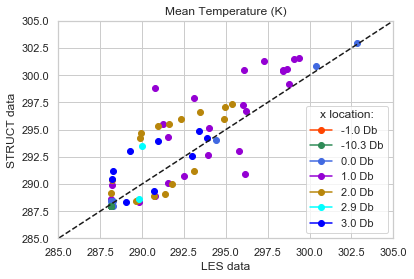

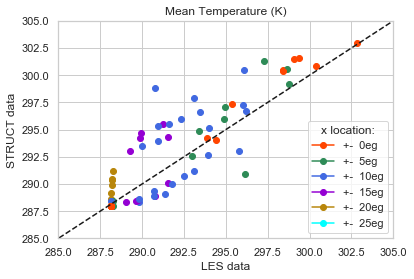

In [22]:
# Mean
plot_xy_plot(mean_les, mean_stc, probe_locations, xlim=(285,305), title='Mean Temperature (K)')
plot_xy_plot_angle(mean_les[1:], mean_stc[1:], probe_locations[1:], xlim=(285,305), title='Mean Temperature (K)')

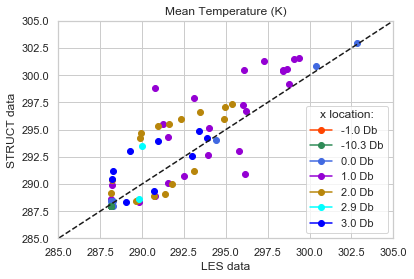

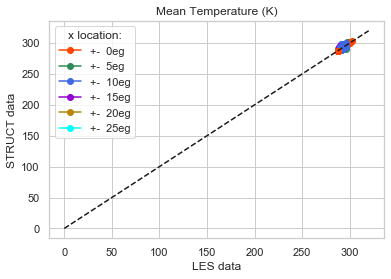

In [23]:
# Mean
plot_xy_plot(mean_les, mean_stc, probe_locations, xlim=(285,305), title='Mean Temperature (K)')
plot_xy_plot_angle(mean_les[1:], mean_stc[1:], probe_locations[1:], xlim=None, title='Mean Temperature (K)')

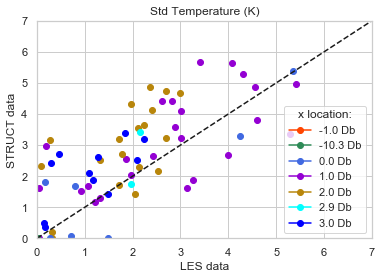

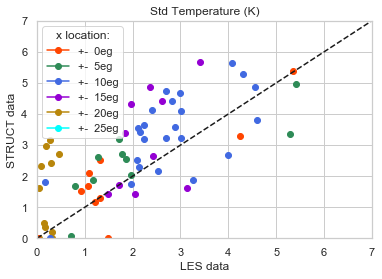

In [24]:
# Std
plot_xy_plot(std_les, std_stc, probe_locations, xlim=(0,7), title='Std Temperature (K)')
plot_xy_plot_angle(std_les[1:], std_stc[1:], probe_locations[1:], xlim=(0,7), title='Std Temperature (K)')

#### along x

In [25]:
def difference(stc, les):
    return stc-les

def normalized_function(stc, les):
    return (stc-T_c_les)/(T_h_les-T_c_les) - (les-T_c_les)/(T_h_les-T_c_les)

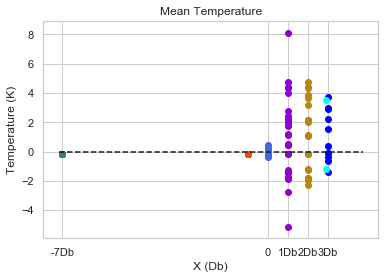

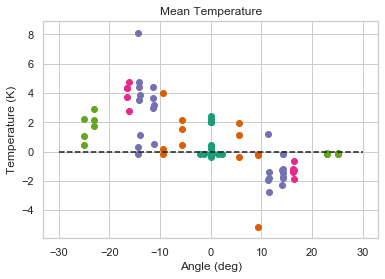

In [26]:
plots.plot_along_x(les_data=mean_les, 
             stc_data=mean_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Mean Temperature')

plot_along_angle(les_data=mean_les[1:], 
             stc_data=mean_stc[1:], 
             function=difference, 
             probe_locations=probe_locations[1:],
             ylabel='Temperature (K)',
             title='Mean Temperature')

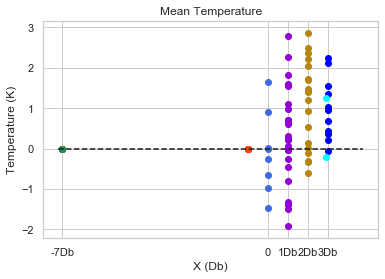

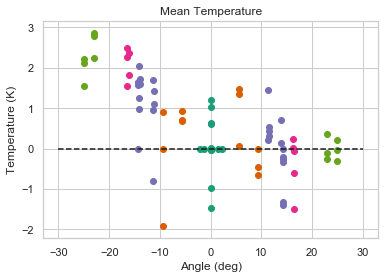

In [27]:
plots.plot_along_x(les_data=std_les, 
             stc_data=std_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Mean Temperature')

plot_along_angle(les_data=std_les[1:], 
             stc_data=std_stc[1:], 
             function=difference, 
             probe_locations=probe_locations[1:],
             ylabel='Temperature (K)',
             title='Mean Temperature')

## Velocity

### Inst data

In [29]:
import utils
import plots 
from plots import InstDataPlot

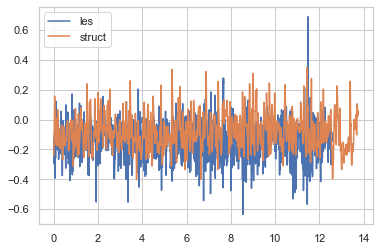

In [30]:
# plt.plot(time_les, T_les)
probe = ('0.021', '0.0539', '0')

time_les, T_les = les.get_probe_data(probe, 'U')
T_stc = structs.read_file(column='Velocity[i] (m/s)', probe=probe)
time_stc = 0.00375* np.arange(len(T_stc))

plt.plot(time_les-10, T_les[:,0], label='les')
plt.plot(time_stc, T_stc, label='struct')
plt.legend()

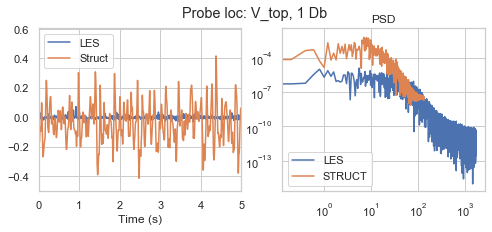

In [31]:
probe =  ('0.021', '0.0539', '0')
ins_d = InstDataPlot(probe, 'Velocity[j] (m/s)')
ins_d.fft(5)
ins_d.plot(probe_shortname='V_top')

### Stat 

In [32]:
mean_les = []
mean_stc = [] 
std_les = []
std_stc = []

for probe in tqdm(probe_locations): 
    time_les, T_les = les.get_probe_data(probe, 'U')
    T_les = T_les[:, 0]
    T_stc = structs.read_file(column='Velocity[i] (m/s)', probe=probe)

    mean_les.append(T_les.mean())
    mean_stc.append(T_stc.mean()) 
    std_les.append(T_les.std())
    std_stc.append(T_stc.std())
    


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:13<00:00,  6.20it/s]


In [35]:
COLOR_MAP = sns.color_palette()
from plots import *


#### xy plot

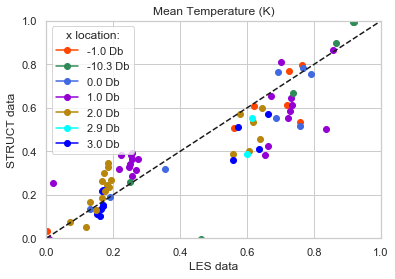

In [36]:
# Mean
plot_xy_plot(mean_les, mean_stc, probe_locations, xlim=(0,1), title='Mean Temperature (K)')

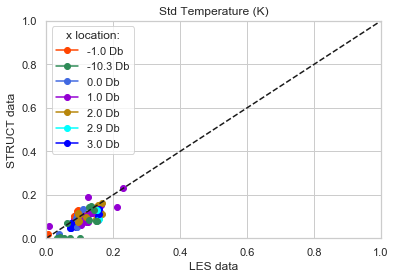

In [40]:
# Std
plot_xy_plot(std_les, std_stc, probe_locations, xlim=(0,1), title='Std Temperature (K)')

#### along x

In [41]:
def difference(stc, les):
    return stc-les

def normalized_function(stc, les):
    return (stc-T_c_les)/(T_h_les-T_c_les) - (les-T_c_les)/(T_h_les-T_c_les)

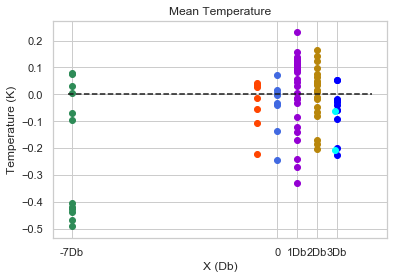

In [42]:
plots.plot_along_x(les_data=mean_les, 
             stc_data=mean_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Mean Temperature')

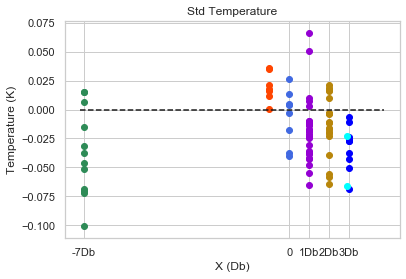

In [43]:
plots.plot_along_x(les_data=std_les, 
             stc_data=std_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Std Temperature')

## TKE

### Inst data

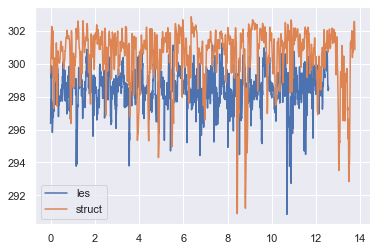

In [7]:
# plt.plot(time_les, T_les)
probe = ('0.021', '0.0539', '0')

time_les, T_les = les.get_probe_data(probe, 'T')
T_stc = structs.read_file(column='Temperature (K)', probe=probe)
time_stc = 0.00375* np.arange(len(T_stc))

plt.plot(time_les-10, T_les, label='les')
plt.plot(time_stc, T_stc, label='struct')
plt.legend()

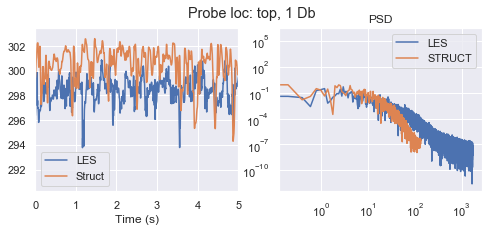

In [12]:
probe =  ('0.021', '0.0539', '0')
ins_d = InstData(probe, 'T')
ins_d.fft(5)
ins_d.plot(probe_shortname='top')

### Stat 

In [10]:
mean_les = []
mean_stc = [] 
std_les = []
std_stc = []

for probe in tqdm(probe_locations): 
    time_les, T_les = les.get_probe_data(probe, 'T')
    T_stc = structs.read_file(column='Temperature (K)', probe=probe)

    mean_les.append(T_les.mean())
    mean_stc.append(T_stc.mean()) 
    std_les.append(T_les.std())
    std_stc.append(T_stc.std())
    


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  9.04it/s]


In [13]:
COLOR_MAP = sns.color_palette()
import plots
reload(plots)
from plots import *


#### xy plot

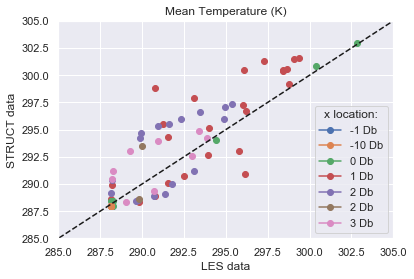

In [14]:
# Mean
plot_xy_plot(mean_les, mean_stc, probe_locations, xlim=(285,305), title='Mean Temperature (K)')

In [ ]:
# Std
plot_xy_plot(std_les, std_stc, probe_locations, xlim=(0,8), title='Std Temperature (K)')

#### along x

In [16]:
def difference(stc, les):
    return stc-les

def normalized_function(stc, les):
    return (stc-T_c_les)/(T_h_les-T_c_les) - (les-T_c_les)/(T_h_les-T_c_les)

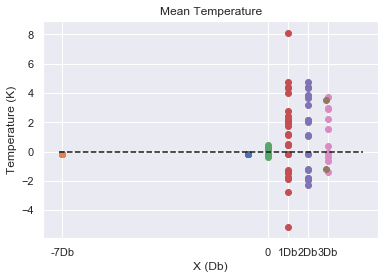

In [17]:
plots.plot_along_x(les_data=mean_les, 
             stc_data=mean_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Mean Temperature')

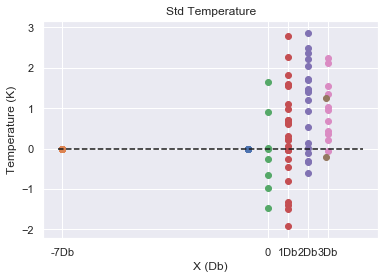

In [18]:
plots.plot_along_x(les_data=std_les, 
             stc_data=std_stc, 
             function=difference, 
             probe_locations=probe_locations,
             ylabel='Temperature (K)',
             title='Std Temperature')

## Location plot

In [296]:
def collect_velocity_probe_history_as_dict(working_dir, file_name):
    folders = get_folders(glob.glob1(working_dir, '*'))
    time_history = {}

    for folder in folders:
        file = os.path.join(working_dir, folder, file_name)
        with open(file, 'r') as f:
            lines = f.readlines()
        content = []
        for line in lines[4:]:
            probes = re.findall('([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)? [+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)? [+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)', line)
            N_probes = len(probes)    
            data = np.zeros((N_probes, 3)) 

            assert N_probes == 85, "Check the parser. The number of the probe should be 85"
            for i in range(N_probes):
                U,V,W = probes[i].split()
                data[i][0] = float(U)
                data[i][1] = float(V)
                data[i][2] = float(W)

            # Save it to the time history 
            time = float(line.split()[0])
            time_history[time] = data
    
    # Get the probe coordinate tuples
    coords = get_coordinates_of_probes(lines)
    
    return coords, time_history

def get_probe_index(probe_name, coord_list):
    """ Find the index of coord from the coord_list """
    assert type(probe_name) is tuple, "The given probe name should be (x, y, z) tuple"
    return coord_list.index(probe_name)

### LES

In [297]:
# Get LES data
coords, time_history = collect_velocity_probe_history_as_dict(working_dir, file_name='U')


In [298]:
# Find the probe

probe_name = (str(0.021*probe_location), '0.0539', '0') 
id_probe = get_probe_index(probe_name, coords) 

Us, Vs, Ws = [],[],[]

time = list(time_history.keys())
for t in time:
    U, V, W = time_history[t][id_probe]
    
    Us.append(U)
    Vs.append(V)
    Ws.append(W)

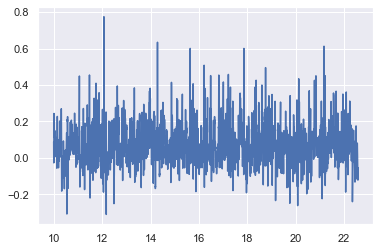

In [299]:
plt.plot(time, Us)

In [417]:
df_struct_U = pd.read_csv(os.path.join(DATA_DIR, "probe_6668_7232_U.csv"))
df_struct_V = pd.read_csv(os.path.join(DATA_DIR, "probe_6668_7232_V.csv"))
df_struct_W = pd.read_csv(os.path.join(DATA_DIR, "probe_6668_7232_W.csv"))

In [418]:
len(df_struct_W)

564

In [422]:
les, stc = _pp_Velocity(probe_name)

In [423]:
stc.mean(axis=1)

array([ 0.23570476, -0.07062511,  0.03278208])

In [425]:
x_unique = np.unique(np.array(probe_locations)[:,0])
mean_les, std_les, mean_stc, std_stc = get_all_probes_data(probe_locations[0:5], 
                                                      datatype='Velocity')

In [426]:
def plot_xyplot(les, stc, x_unique, title='', xlim=(0,1)):
    # Plot 
    for group in range(len(x_unique)):
        plt.scatter(les[group], stc[group], label='%s'%x_unique[group])

    plt.legend()
    plt.plot([0,1], [0,1], 'b')

    # +- 20%
    plt.plot([0,1], [0,1.2], 'b--')
    plt.plot([0,1], [0,0.8], 'b--')
    plt.text(xlim[1], xlim[1]*0.8, "-20%" )
#     plt.text(xlim[1], xlim[1]*1.2, "+20%" )
    # +- 50%
    plt.plot([0,1], [0,1.5], color='silver', linestyle='--')
    plt.plot([0,1], [0,0.5], color='silver', linestyle='--')
    plt.text(xlim[1], xlim[1]*0.5, "-50%" )
#     plt.text(xlim[1], xlim[1]*1.5, "+50%" )
    
    plt.xlim(0,0.1)
    plt.ylim(0,0.1)

    plt.xlabel("LES")
    plt.ylabel("Struct-e" )
    plt.title(title)

In [ ]:
# LES data
for probe_loc in [1,2 ,3]:
    probe_name = (str(0.021*probe_loc), '0.04885', '0.02278') 
    #     
    les, stc = _pp_Velocity(probe_name)
    
    
    
    
    
    plot = plt.figure(figsize=(8,3))
    plt.suptitle("Probe loc: top-side, %s Db"%probe_loc)


    # Inst Temp
    ax1 = plot.add_subplot(121)    
    ax1.plot(time_les-10, temp_les_norm, label='LES')
    ax1.plot(time, temp_stc_norm, label='Struct')
    ax1.set_ylabel('Temperature (Normalized)')
    ax1.set_xlabel('Time (s)')
    ax1.set_title("Inst. Temp")
    ax1.set_xlim(0,10)
    ax1.legend()
    
    
    # Plot the FFT
    ax2 = plot.add_subplot(122)

    time_span = 5
    dt_les = time_les[1]-time_les[0]
    freq_les, psdx_les = get_psd(dt_les, temp_les[:int(time_span / dt_les)])

    dt_stc = 0.00375
    freq_stc, psdx_stc = get_psd(dt_stc, temp_stc.values[:int(time_span / dt_stc)])

    ax2.plot(freq_les, psdx_les, label='LES')
    ax2.plot(freq_stc, psdx_stc, label='STRUCT')
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_title("PSD")
    ax2.legend()



# Line

In [45]:
working_dir = r'F:\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Lines'
table_name = 'Lines_table'

In [54]:
from manchester import ManchesterLine

In [78]:
from plots import plot_vertical_summary

## Summary Plot

loc:0 fails


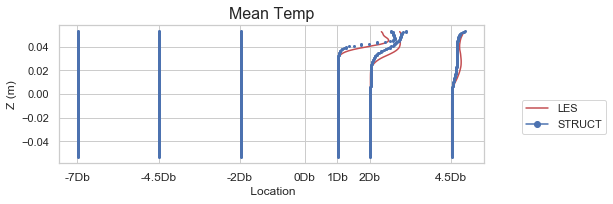

In [79]:
plot_vertical_summary('T', title='Mean Temp')

loc:0 fails


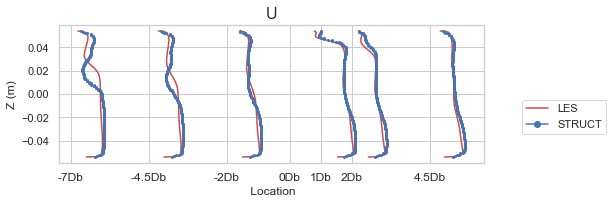

In [72]:
plot_vertical_summary('U', title='U', shift=0, scaling_fac=1)

Initiating line indices...
Done!
Initiating line indices...
Done!
Initiating line indices...
Done!
loc:0 fails
Initiating line indices...
Done!
Initiating line indices...
Done!
Initiating line indices...
Done!


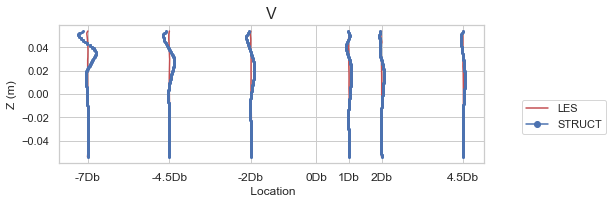

In [67]:
plot_vertical_summary('V', title='V', shift=0, scaling_fac=1)

Initiating line indices...
Done!
Initiating line indices...
Done!
Initiating line indices...
Done!
loc:0 fails
Initiating line indices...
Done!
Initiating line indices...
Done!
Initiating line indices...
Done!


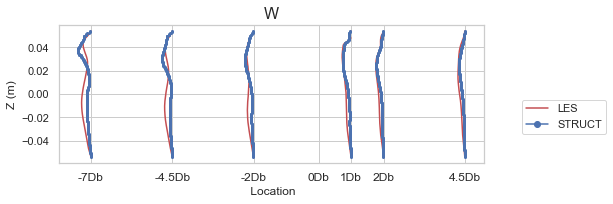

In [68]:
plot_vertical_summary('W', title='W', shift=0, scaling_fac=1)

Initiating line indices...
Done!


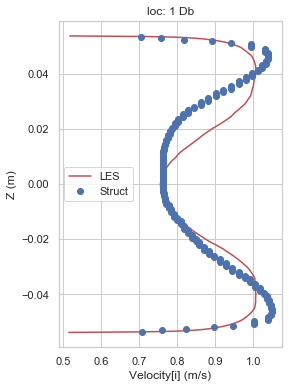

Initiating line indices...
Done!


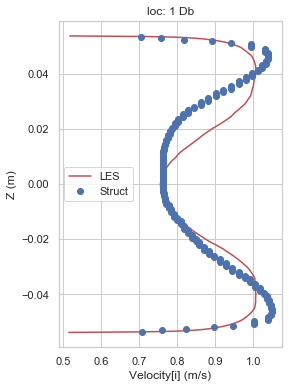

Initiating line indices...
Done!


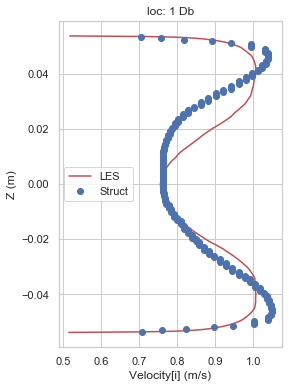

Initiating line indices...
Done!


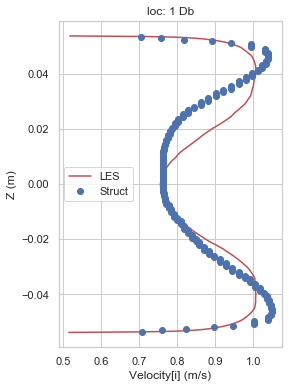

Initiating line indices...
Done!


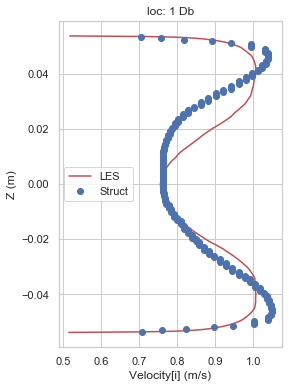

Initiating line indices...
Done!


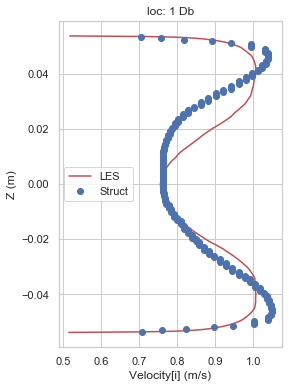

In [62]:
for loc in [ -7, -4.5, -2, 1, 2, 4.5]:
    try:
        plot_horizontal(x_loc=1, data_type='U', xlim=None)
    except:
        pass



## Single Plot

Initiating line indices...
Done!


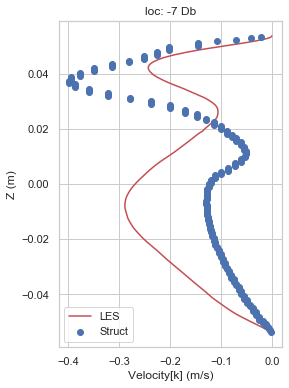

Initiating line indices...
Done!


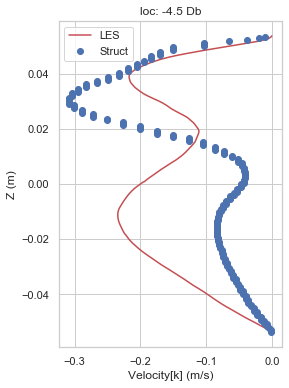

Initiating line indices...
Done!


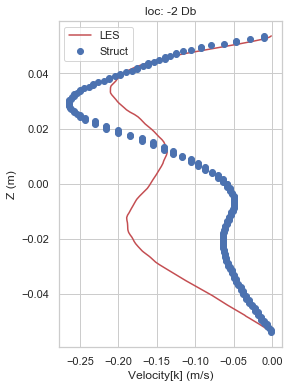

Initiating line indices...
Done!


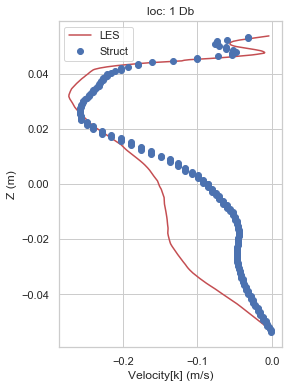

Initiating line indices...
Done!


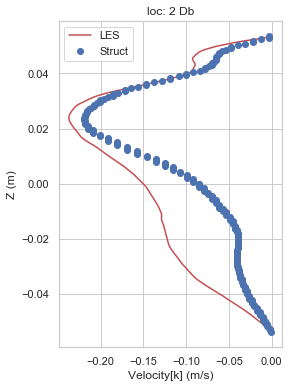

Initiating line indices...
Done!


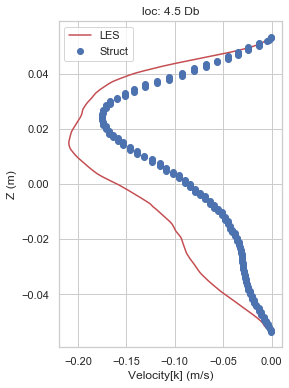

In [61]:
for loc in [ -7, -4.5, -2, 1, 2, 4.5]:
    try:
        plot_vertical(x_loc=loc, data_type='W')
    except:
        pass